In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.decomposition import PCA

<h1>Dimensionality Reduction</h1>

In [3]:
blob_coords, _ = make_blobs(n_samples = 1000, n_features = 2, centers = 1)

In [4]:
def plot_blobs(blob_coords):
    plt.scatter(blob_coords[:, 0], blob_coords[:, 1], s = 1)
    plt.gca().set_aspect('equal')
    plt.show()

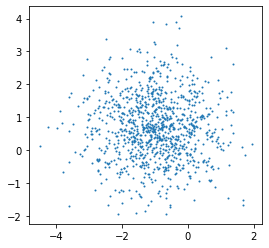

In [5]:
plot_blobs(blob_coords)

In [6]:
transform_matrix = np.array([
    [0.7, 1.5],
    [1, 0.3]
])

In [7]:
X = blob_coords @ transform_matrix

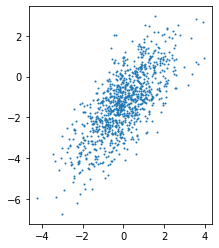

In [8]:
plot_blobs(X)

In [9]:
X.mean(axis = 0)

array([-0.02290527, -1.32021755])

In [10]:
pca = PCA()

In [11]:
pca.fit(X)

PCA()

In [12]:
pca.components_

array([[-0.57642856, -0.81714755],
       [-0.81714755,  0.57642856]])

In [13]:
pca.transform(X)

array([[ 1.35674174, -0.78577087],
       [-3.31051461, -0.58787444],
       [-2.83418657, -0.22301822],
       ...,
       [ 3.5717946 , -0.49521212],
       [-3.273424  ,  0.18000726],
       [-1.18081851, -0.62914939]])

In [14]:
pca.explained_variance_ratio_

array([0.87074302, 0.12925698])

In [15]:
pca.explained_variance_

array([3.3859658 , 0.50262787])

In [16]:
v1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 2
v2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * 2

In [17]:
v1, v2

(array([-2.12137169, -3.00726543]), array([-1.15865399,  0.8173325 ]))

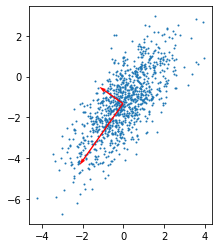

In [18]:
plt.scatter(X[:, 0], X[:, 1], s = 1)
plt.quiver([pca.mean_[0]], [pca.mean_[1]], [v1[0]], [v1[1]], scale_units = "xy", angles = "xy", scale = 1, color = "red")
plt.quiver([pca.mean_[0]], [pca.mean_[1]], [v2[0]], [v2[1]], scale_units = "xy", angles = "xy", scale = 1, color = "red")

plt.gca().set_aspect('equal')
plt.show()

In [19]:
pca.mean_

array([-0.02290527, -1.32021755])

In [20]:
pca.components_[0][0]

-0.5764285581763914

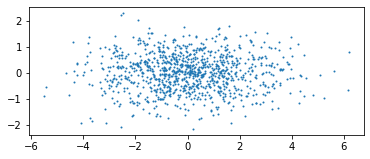

In [21]:
plot_blobs(pca.transform(X))

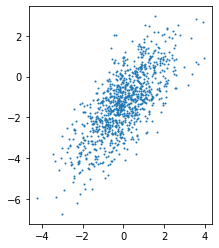

In [22]:
plot_blobs(pca.inverse_transform(pca.transform(X)))